In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
dt=pd.read_excel('glass.xlsx',sheet_name='glass')
dt

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 1. Exploratory Data Analysis (EDA):


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
dt.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
dt.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


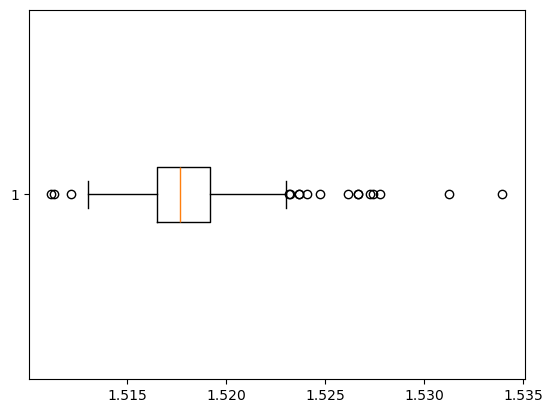

In [7]:
box1=plt.boxplot(dt["RI"],vert=False)


In [8]:
[item.get_xdata() for item in box1['fliers']]

[array([1.51215, 1.51115, 1.51131, 1.52667, 1.5232 , 1.52725, 1.5241 ,
        1.52475, 1.53125, 1.53393, 1.52664, 1.52739, 1.52777, 1.52614,
        1.52369, 1.52315, 1.52365])]

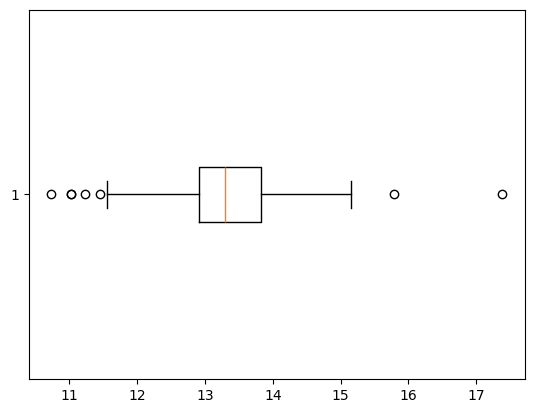

In [9]:
box2=plt.boxplot(dt["Na"],vert=False)


In [10]:
[item.get_xdata() for item in box2['fliers']]

[array([11.45, 10.73, 11.23, 11.02, 11.03, 17.38, 15.79])]

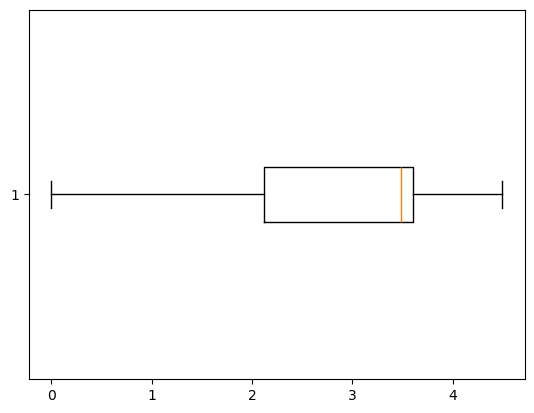

In [11]:
box3=plt.boxplot(dt["Mg"],vert=False)


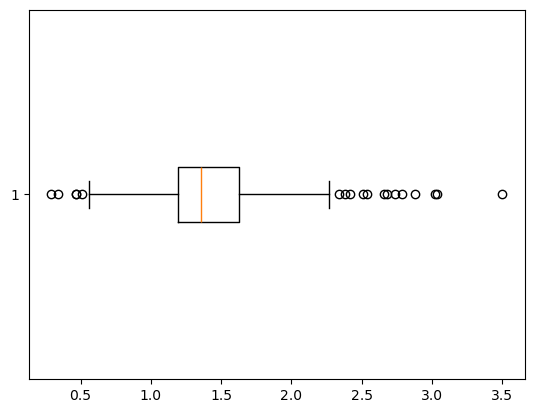

In [12]:
box4=plt.boxplot(dt["Al"],vert=False)


In [13]:
[item.get_xdata() for item in box4['fliers']]

[array([0.29, 0.47, 0.47, 0.51, 0.34, 3.5 , 3.04, 3.02, 2.38, 2.79, 2.68,
        2.54, 2.34, 2.66, 2.51, 2.42, 2.74, 2.88])]

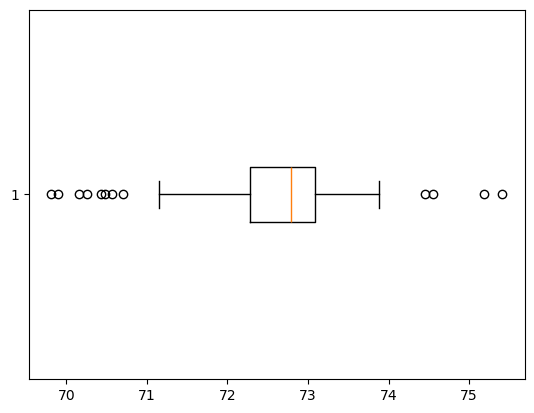

In [14]:
box5=plt.boxplot(dt["Si"],vert=False)


In [15]:
[item.get_xdata() for item in box5['fliers']]

[array([70.57, 69.81, 70.16, 69.89, 70.48, 70.7 , 70.26, 70.43, 74.45,
        74.55, 75.41, 75.18])]

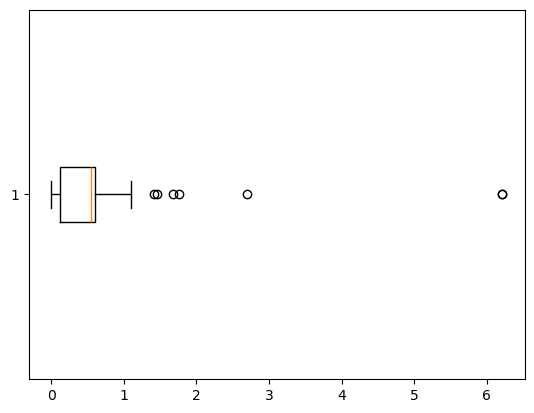

In [16]:
box6=plt.boxplot(dt["K"],vert=False)


In [17]:
[item.get_xdata() for item in box6['fliers']]

[array([1.68, 6.21, 6.21, 1.76, 1.46, 2.7 , 1.41])]

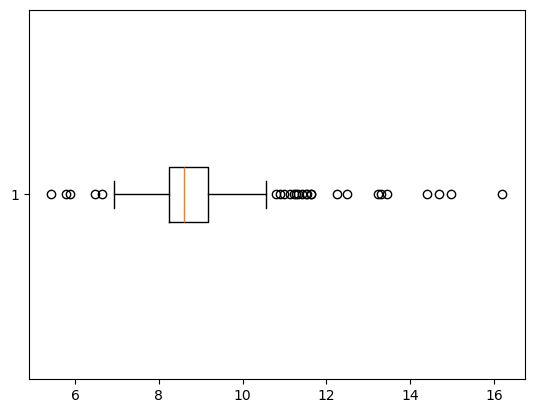

In [18]:
box7=plt.boxplot(dt["Ca"],vert=False)


In [19]:
[item.get_xdata() for item in box7['fliers']]

[array([ 5.87,  6.65,  5.43,  5.79,  6.47, 11.64, 10.79, 13.24, 13.3 ,
        16.19, 11.52, 10.99, 14.68, 14.96, 14.4 , 11.14, 13.44, 11.41,
        11.62, 11.53, 11.32, 12.24, 12.5 , 11.27, 10.88, 11.22])]

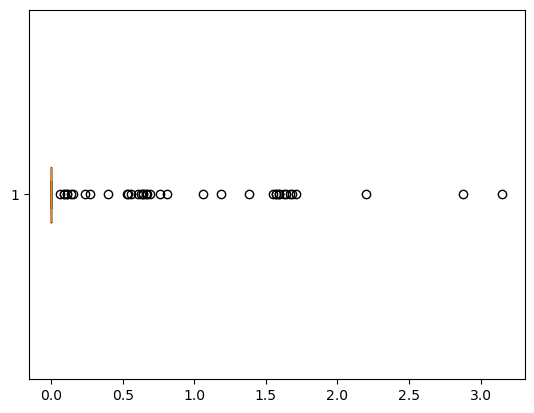

In [20]:
box8=plt.boxplot(dt["Ba"],vert=False)


In [21]:
[item.get_xdata() for item in box8['fliers']]

[array([0.09, 0.11, 0.69, 0.14, 0.11, 3.15, 0.27, 0.09, 0.06, 0.15, 2.2 ,
        0.24, 1.19, 1.63, 1.68, 0.76, 0.64, 0.4 , 1.59, 1.57, 0.61, 0.81,
        0.66, 0.64, 0.53, 0.63, 0.56, 1.71, 0.67, 1.55, 1.38, 2.88, 0.54,
        1.06, 1.59, 1.64, 1.57, 1.67])]

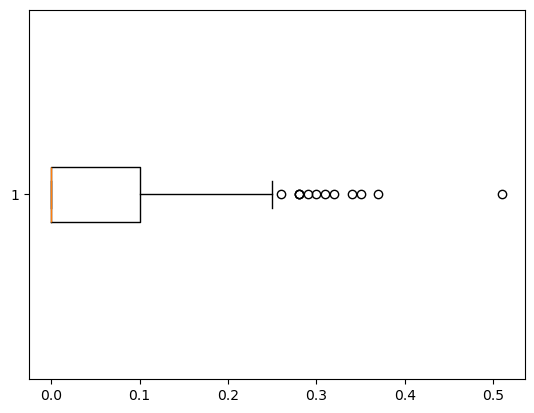

In [22]:
box9=plt.boxplot(dt["Fe"],vert=False)


In [23]:
[item.get_xdata() for item in box9['fliers']]

[array([0.26, 0.3 , 0.31, 0.32, 0.34, 0.28, 0.29, 0.28, 0.35, 0.37, 0.51,
        0.28])]

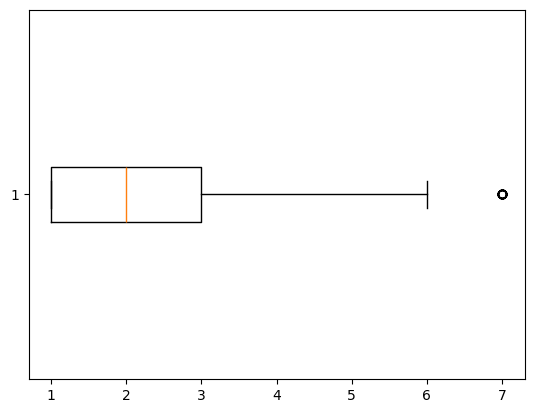

In [24]:
box10=plt.boxplot(dt["Type"],vert=False)


In [25]:
[item.get_xdata() for item in box10['fliers']]

[array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7], dtype=int64)]

# 2: Data Visualization:


<Axes: xlabel='RI', ylabel='Count'>

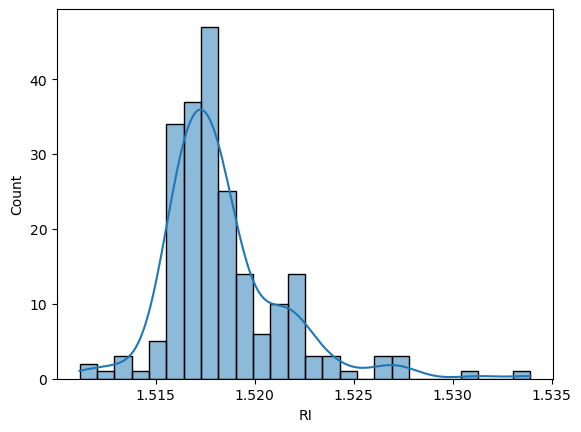

In [26]:
sns.histplot(dt["RI"],kde=True)

<Axes: xlabel='Na', ylabel='Count'>

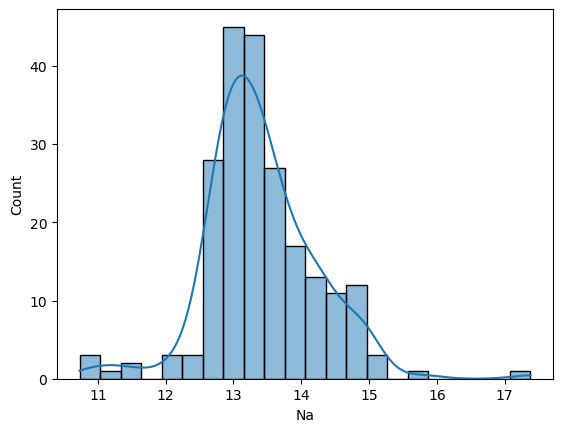

In [27]:
sns.histplot(dt["Na"],kde=True)

<Axes: xlabel='Mg', ylabel='Count'>

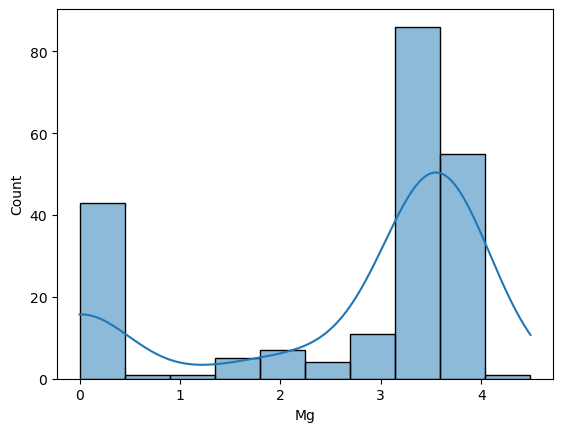

In [28]:
sns.histplot(dt["Mg"],kde=True)

<Axes: xlabel='Al', ylabel='Count'>

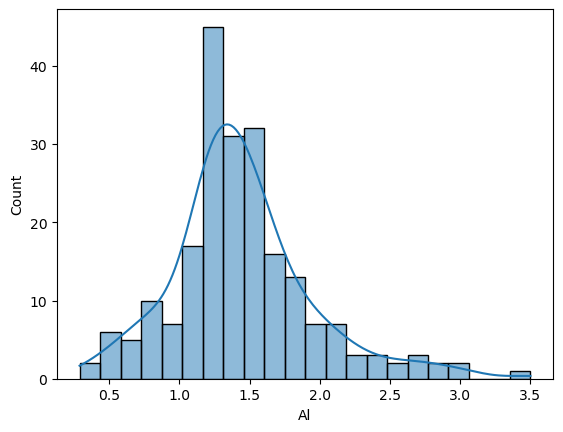

In [29]:
sns.histplot(dt["Al"],kde=True)

<Axes: xlabel='Si', ylabel='Count'>

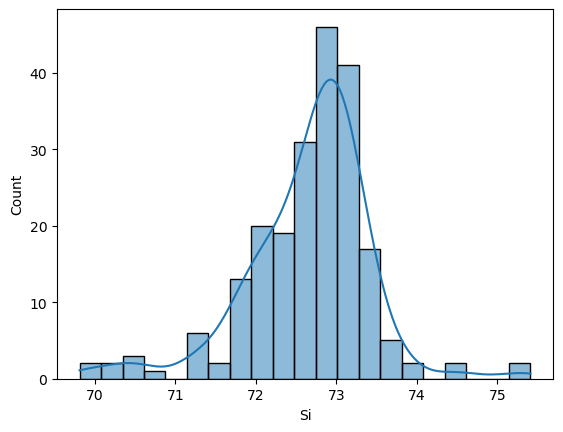

In [30]:
sns.histplot(dt["Si"],kde=True)

<Axes: xlabel='K', ylabel='Count'>

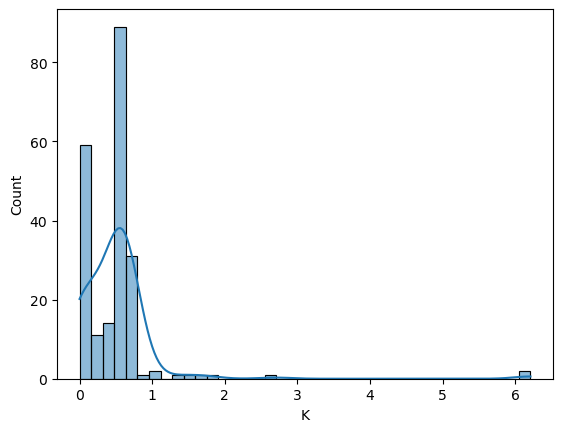

In [31]:
sns.histplot(dt["K"],kde=True)

<Axes: xlabel='Ca', ylabel='Count'>

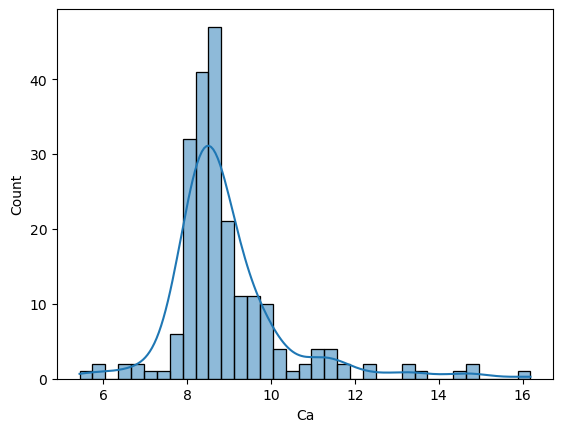

In [32]:
sns.histplot(dt["Ca"],kde=True)

<Axes: xlabel='Ba', ylabel='Count'>

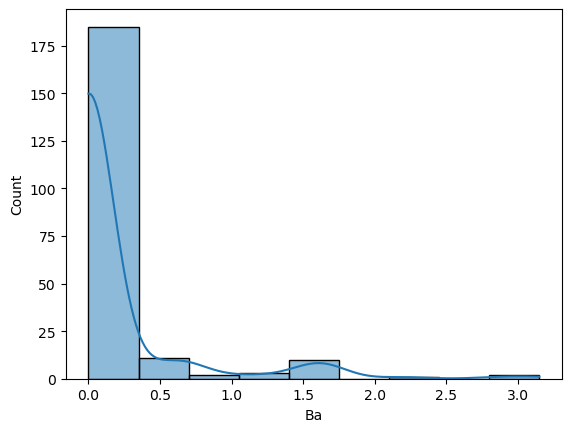

In [33]:
sns.histplot(dt["Ba"],kde=True)

<Axes: xlabel='Fe', ylabel='Count'>

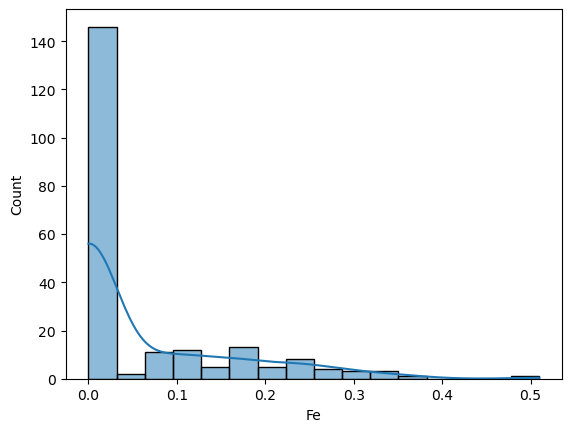

In [34]:
sns.histplot(dt["Fe"],kde=True)

<Axes: xlabel='Type', ylabel='Count'>

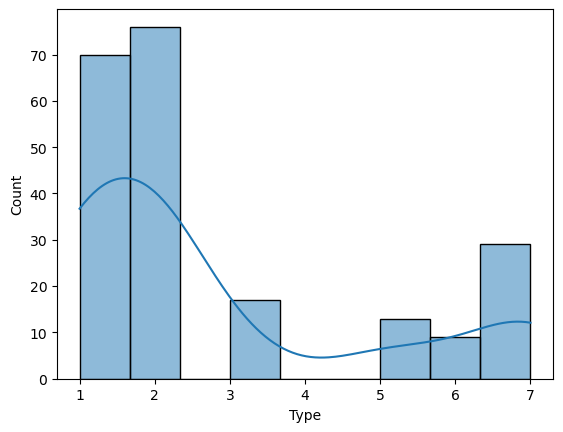

In [35]:
sns.histplot(dt["Type"],kde=True)

<Figure size 1000x800 with 0 Axes>

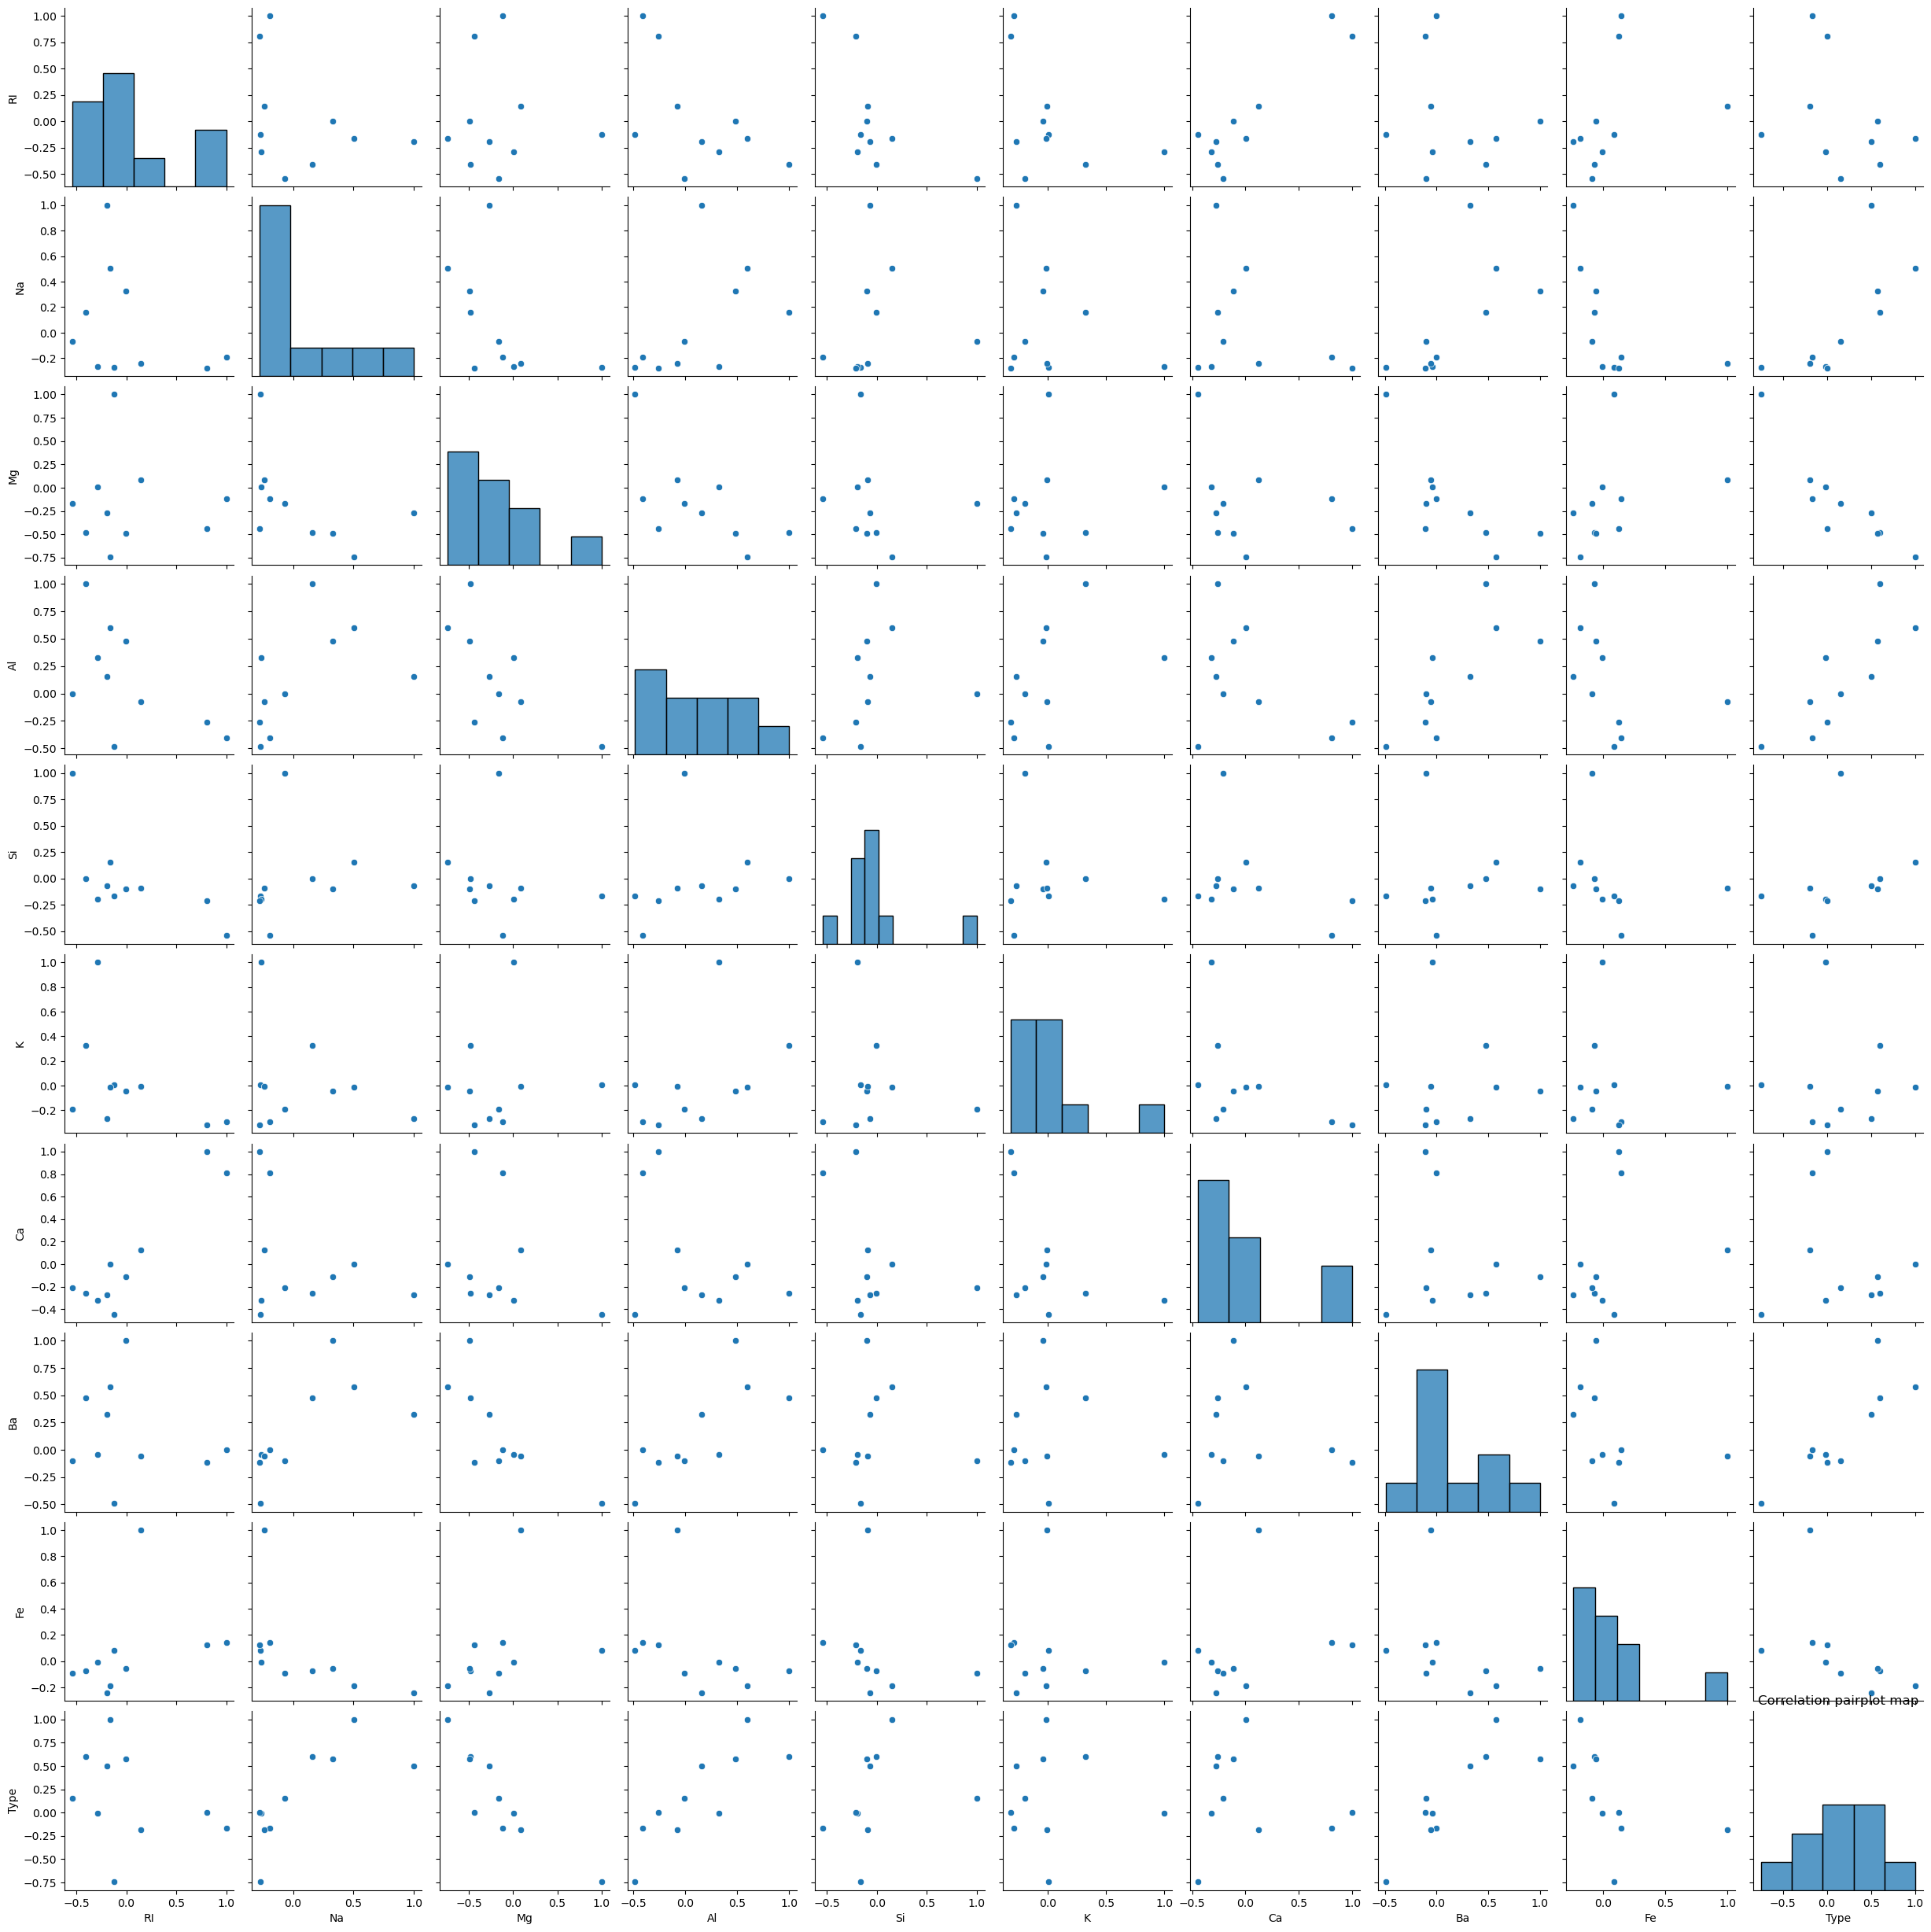

In [36]:
plt.figure(figsize=(10, 8))
sns.pairplot(dt.corr())
plt.title('Correlation pairplot map')
plt.show()

# 3: Data Preprocessing


In [37]:
std = StandardScaler()
dt_normal=std.fit_transform(dt)
dt_normal

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [-0.61239854,  1.19327046, -1.86551055, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [-0.41436305,  1.00915211, -1.86551055, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

# 4: Random Forest Model Implementation

In [57]:

X = dt.drop(columns=['Type'])
y = dt['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=10,random_state= 42,shuffle=True) #Bootstrap

model = RandomForestClassifier(n_estimators=100,random_state= 42,max_depth=None,  min_samples_leaf=2,max_features='sqrt')

results = cross_val_score(model, X, y, cv=kfold)
print(results)
print(results.mean())

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


[0.90909091 0.86363636 0.54545455 0.68181818 0.9047619  0.71428571
 0.9047619  0.95238095 0.66666667 0.76190476]
0.7904761904761906
Accuracy: 0.8372093023255814
Precision: 0.8568475452196384
Recall: 0.8372093023255814
F1-score: 0.8296046862394331


# 5: Bagging and Boosting Methods

In [58]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)


C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [59]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy_bagging, precision_bagging, recall_bagging, f1_bagging = evaluate_model(y_test, y_pred_bagging)
print(f'Bagging Accuracy: {accuracy_bagging}')
print(f'Bagging Precision: {precision_bagging}')
print(f'Bagging Recall: {recall_bagging}')
print(f'Bagging F1-score: {f1_bagging}')



Bagging Accuracy: 0.8604651162790697
Bagging Precision: 0.86002886002886
Bagging Recall: 0.8604651162790697
Bagging F1-score: 0.8513816689466485


In [60]:
adaboost_model = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost = evaluate_model(y_test, y_pred_adaboost)
print(f'AdaBoost Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Precision: {precision_adaboost}')
print(f'AdaBoost Recall: {recall_adaboost}')
print(f'AdaBoost F1-score: {f1_adaboost}')

AdaBoost Accuracy: 0.7674418604651163
AdaBoost Precision: 0.7990033222591363
AdaBoost Recall: 0.7674418604651163
AdaBoost F1-score: 0.7599935424119093


C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Additional Notes
1. Explain Bagging and Boosting methods. How is it different from each other?

=>Bagging and Boosting are ensemble learning methods used to enhance machine learning model performance by combining predictions from multiple base models. Bagging trains independent models on different subsets of data using bootstrap sampling and averages or votes their predictions. It reduces variance and overfitting by creating diverse models. Boosting, on the other hand, builds models sequentially, focusing on instances that previous models struggle with, and combines predictions using weighted voting. It aims to reduce bias and improve accuracy by iteratively correcting errors. While Bagging emphasizes diversity, Boosting focuses on leveraging the strengths of previous models.
2. Explain how to handle imbalance in the data.

=> Handling class imbalance in datasets is crucial for building effective machine learning models. Various strategies can be employed to address this issue:

1.Resampling Techniques: Oversampling, undersampling, and techniques like SMOTE can rebalance the dataset by adjusting the class distribution.

2.Algorithmic Approaches: Cost-sensitive learning and ensemble methods like Random Forests can mitigate imbalance by assigning different costs to misclassifications or combining multiple models.

3.Evaluation Metrics: Precision, recall, F1-score, and AUC-ROC are more suitable metrics than accuracy for imbalanced datasets.

4.Data-level Preprocessing: Feature selection, data cleaning, and feature engineering can enhance the discriminative power of the dataset.

5.Algorithm Selection: Choose algorithms less sensitive to class imbalance and avoid those prone to bias towards the majority class.

6.Cross-validation: Ensure that each fold of the data preserves the class distribution to prevent overfitting.

7.Ensemble Methods: Combine multiple classifiers to improve overall performance and robustness.

8.Threshold Adjustment: Fine-tune classification thresholds to optimize for specific evaluation metrics.
